In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
data = pd.read_csv('uber_drives.csv')

In [5]:
data.head()


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [11]:
data.shape

(653, 7)

In [13]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [14]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format='%m/%d/%Y %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format='%m/%d/%Y %H:%M')

C:\Users\mroku\AppData\Local\Temp\ipykernel_11336\2068878997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format='%m/%d/%Y %H:%M')
C:\Users\mroku\AppData\Local\Temp\ipykernel_11336\2068878997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format='%m/%d/%Y %H:%M')


In [15]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [16]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
    
data['HOUR'] = hour
data['DAY'] = day
data['DAY OF WEEK'] = dayofweek
data['MONTH'] = month
data['WEEKDAY'] = weekday
    


C:\Users\mroku\AppData\Local\Temp\ipykernel_11336\1119283665.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HOUR'] = hour
C:\Users\mroku\AppData\Local\Temp\ipykernel_11336\1119283665.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DAY'] = day
C:\Users\mroku\AppData\Local\Temp\ipykernel_11336\1119283665.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [17]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


Kategorie

In [18]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

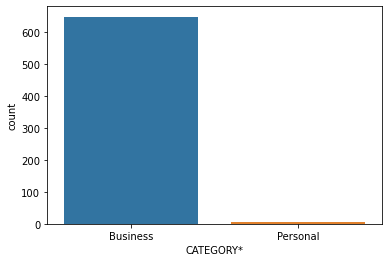

In [19]:
sns.countplot(x='CATEGORY*', data=data)

Ile ludzie podróżują

<AxesSubplot:ylabel='Frequency'>

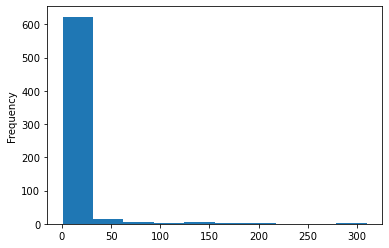

In [20]:
data['MILES*'].plot.hist()

O której godzinie ludzie zamawiają ubera

Text(0.5, 1.0, 'Liczba zamówień ubera w danych godzinach')

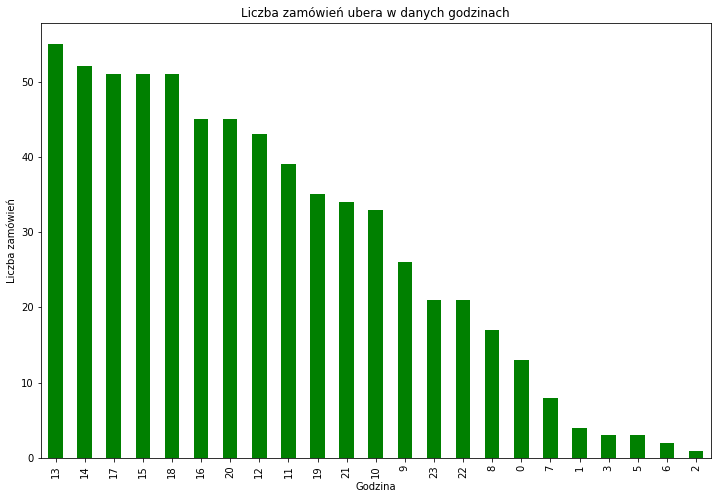

In [25]:
hour = data['START_DATE*'].dt.hour.value_counts()
hour.plot(kind='bar', color='green', figsize=(12, 8))

plt.xlabel('Godzina')
plt.ylabel('Liczba zamówień')
plt.title('Liczba zamówień ubera w danych godzinach')

Cel podróży

<AxesSubplot:>

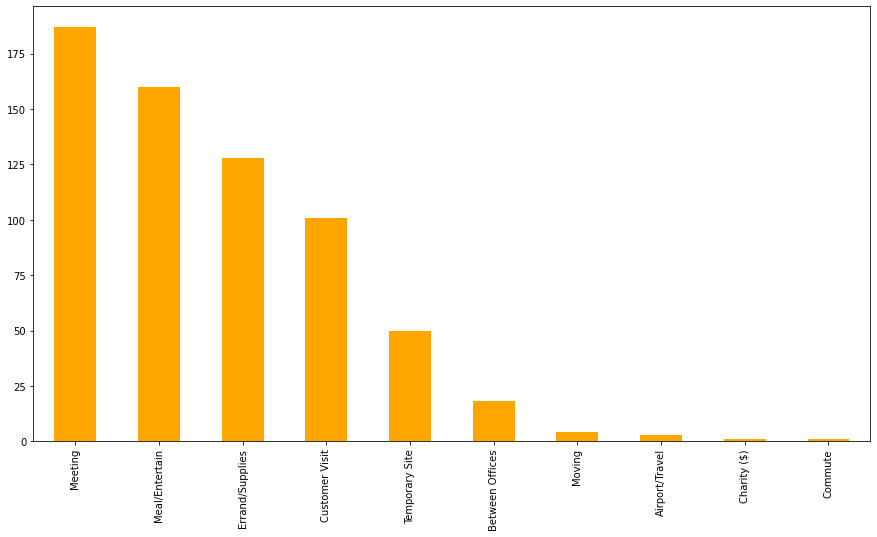

In [31]:
data['PURPOSE*'].value_counts().plot(kind='bar', figsize=(15,8), color='orange')

W jaki dzień jest najwięcej podróży uberem

<AxesSubplot:>

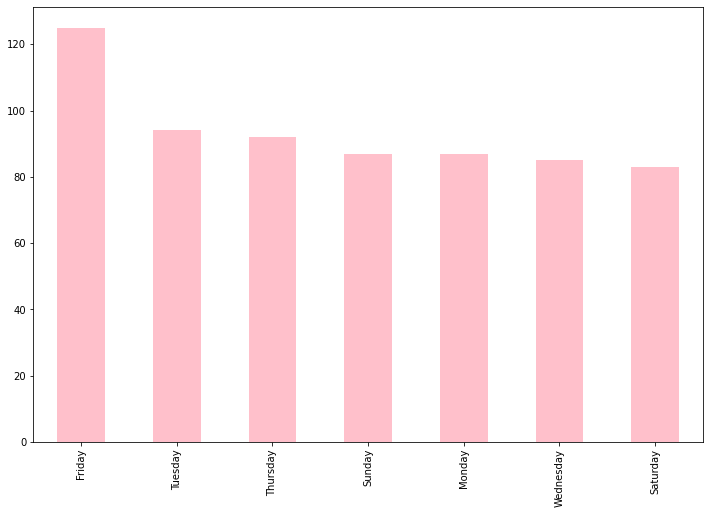

In [36]:
data['WEEKDAY'].value_counts().plot(kind='bar', figsize=(12, 8), color='pink')

Liczba podróży w każdym dniu miesiąca

<AxesSubplot:>

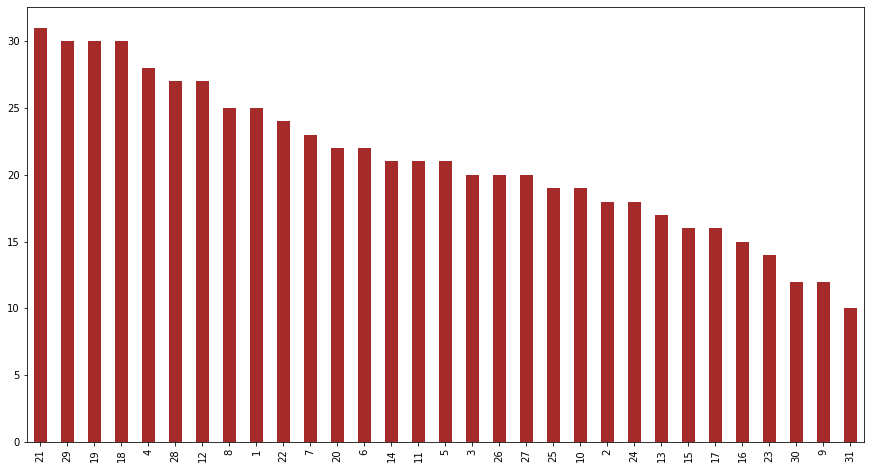

In [37]:
data['DAY'].value_counts().plot(kind='bar', figsize=(15,8), color='brown')

Liczba podróży w każdym miesiącu

C:\Users\mroku\AppData\Local\Temp\ipykernel_11336\1314035604.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MONTH STR'] = data['MONTH'].map(months_str)


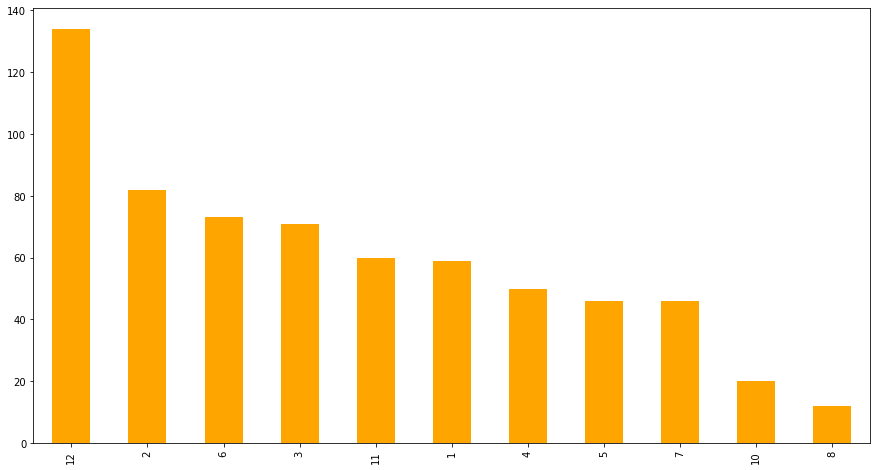

In [39]:
data['MONTH'].value_counts().plot(kind='bar', figsize=(15,8), color='orange')
months_str = {1: 'January',
             2: 'February',
             3: 'March',
             4: 'April',
             5: 'May',
             6: 'June',
             7: 'July',
             8: 'August',
             9: 'September',
             10: 'October',
             11: 'November',
             12: 'December'}
data['MONTH STR'] = data['MONTH'].map(months_str)

<AxesSubplot:>

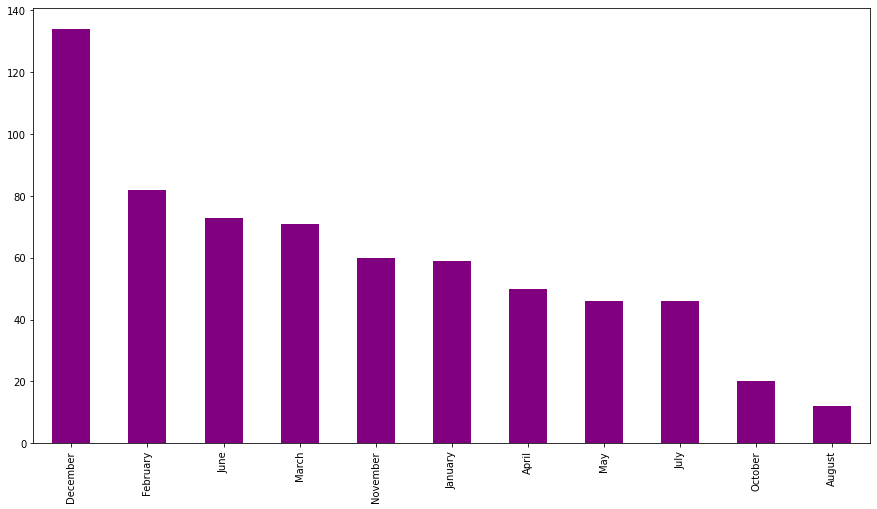

In [42]:
data['MONTH STR'].value_counts().plot(kind='bar', figsize=(15,8), color='purple')

Punkt startowy podróży

<AxesSubplot:>

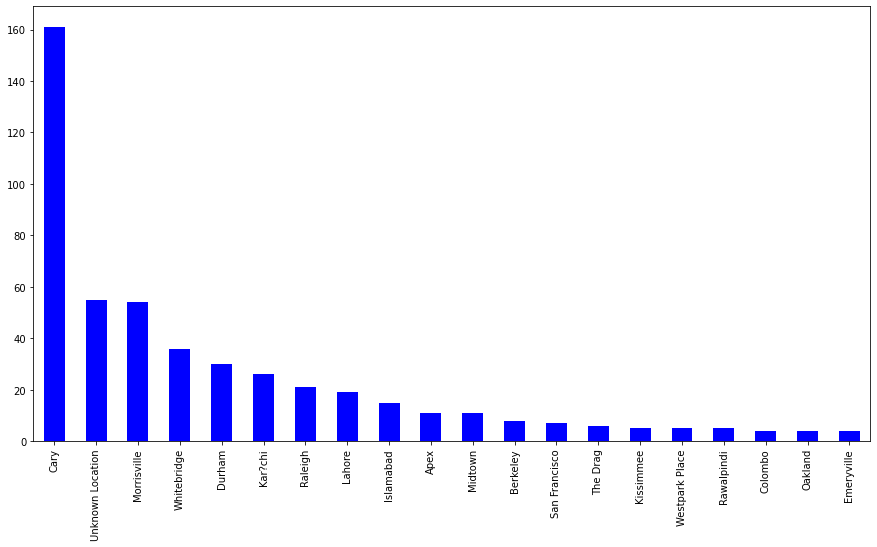

In [45]:
data['START*'].value_counts().head(20).plot(kind='bar', figsize=(15,8), color='blue')

Punkt końcowy podróży

<AxesSubplot:>

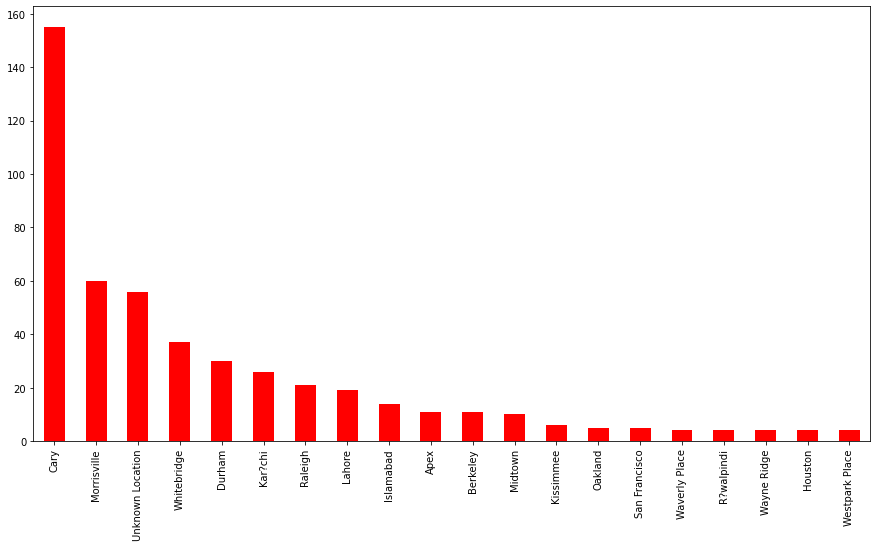

In [46]:
data['STOP*'].value_counts().head(20).plot(kind='bar', figsize=(15,8), color='red')